# In this notebook, we will investigate the characteristics of npn high voltage from ST technology 

---------------------------------------------- 
$$ Specification $$
Model name: NPN high voltage 

$E_l = 1 \mu m$

$E_w = 0.27 \mu m$

-------------------------------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

------------------------------
# DAC rationale 
------------------------------

### 1. Checking the sizing of Bipolar device with the operating point

In [2]:
bipo_current = pd.read_csv('icib_npnpnp.csv', skiprows=1, header=None) # No header
type(bipo_current)
bipo_current = bipo_current.to_numpy()
print(bipo_current.shape)

(201, 385)


In [3]:
num_bipo = np.arange(10,202,2)
print(np.size(num_bipo))
VBCE = bipo_current[:,0]
Ic_npn = bipo_current[:, 1:97]
Ib_npn = bipo_current[:, 97:193]
Ic_pnp = bipo_current[:, 193:289]  
Ib_pnp = bipo_current[:, 289:385] 

96


1. ploting gummel plot for npn

/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_66236/583282781.py:3: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(Ic_npn[:,i]*1e3, Ic_npn[:,i]/Ib_npn[:,i])#, label = f' m = {num_bipo[i]}' )
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_66236/583282781.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize=12)


Text(0.5, 1.0, 'Gummel Plot NPN ')

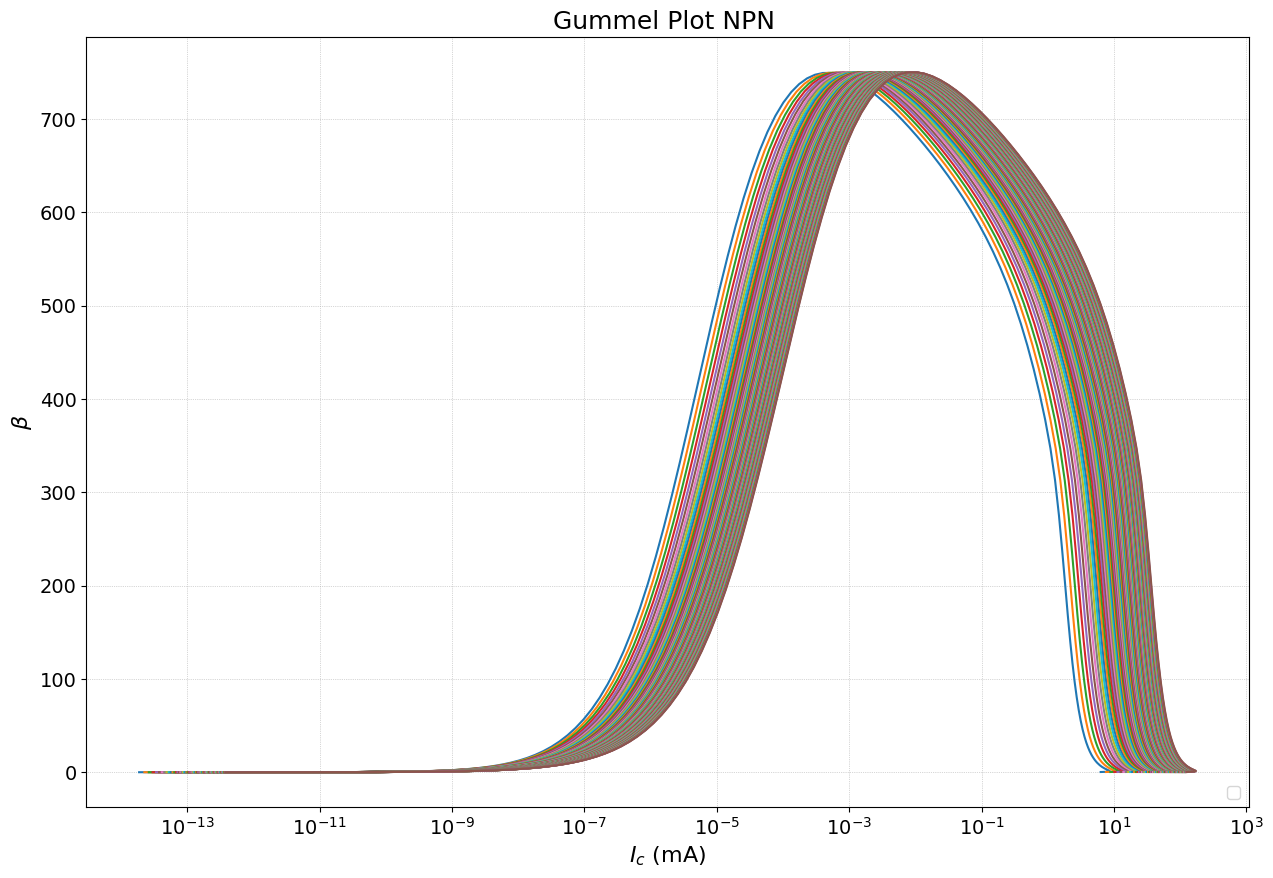

In [4]:

plt.figure(figsize = (15,10))
for i in range(len(num_bipo)):
    plt.semilogx(Ic_npn[:,i]*1e3, Ic_npn[:,i]/Ib_npn[:,i])#, label = f' m = {num_bipo[i]}' )
plt.xlabel(r'$I_c$ (mA)', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
plt.title('Gummel Plot NPN ', fontsize = 18)
# plt.xlim(0.9,1.1)
# plt.xlim(1.9,2.1)
# plt.xlim(2.9,3.1)

Plotting different beta when I = 1mA, 2 mA, 4mA

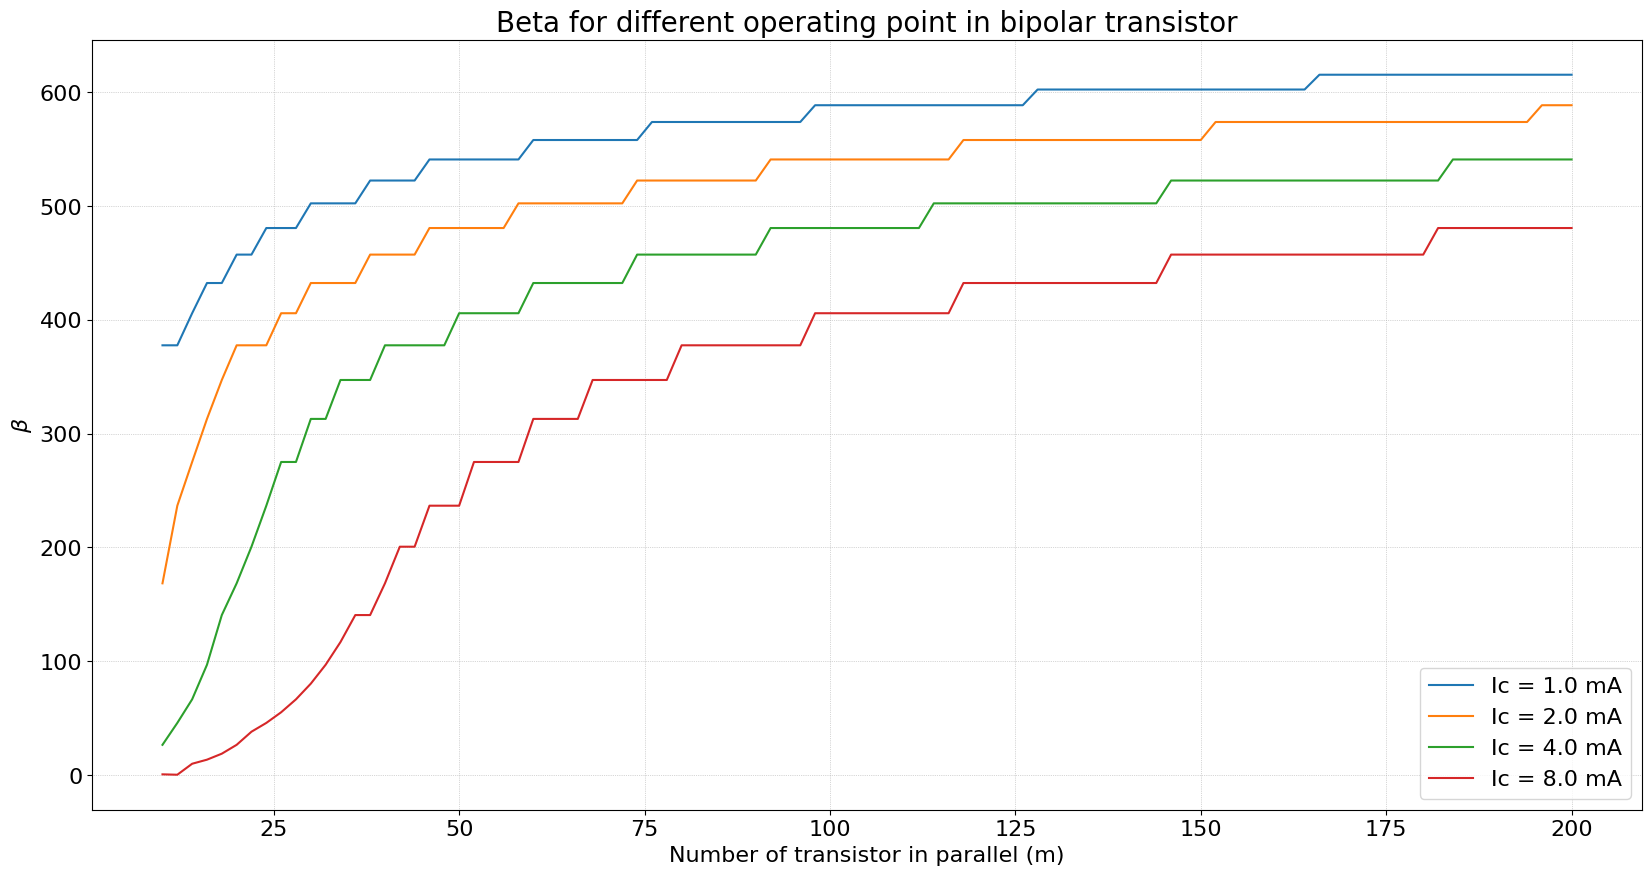

In [5]:
Ir = [1e-3, 2e-3, 4e-3, 8e-3]
def find_index(array, value):
    index = np.argmin(np.abs(array - value))
    return index
beta_Ir = [[],[],[],[]]
for i in range(len(Ir)):
    for j in range(96):
        ind = find_index(Ic_npn[:,j], Ir[i])
        # print('---------')
        # print(Ir[i])
        # print(ind)
        # print('---------')
        beta_Ir[i].append(Ic_npn[:,i][ind]/Ib_npn[:,i][ind])
plt.figure(figsize = (20,10))
for i in range(4):
    plt.plot(num_bipo, beta_Ir[i], label = f'Ic = {Ir[i] * 1e3} mA')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'$\beta$', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.xticks( fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.title('Beta for different operating point in bipolar transistor',fontsize = 20)
plt.savefig('beta_vs_npn.png')

2. Plot Gummel Plot for PNP

/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_66236/1841698931.py:3: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.abs(Ic_pnp[:,i])*1e3, Ic_pnp[:,i]/Ib_pnp[:,i] )
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_66236/1841698931.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize=12)


Text(0.5, 1.0, 'Gummel Plot NPN ')

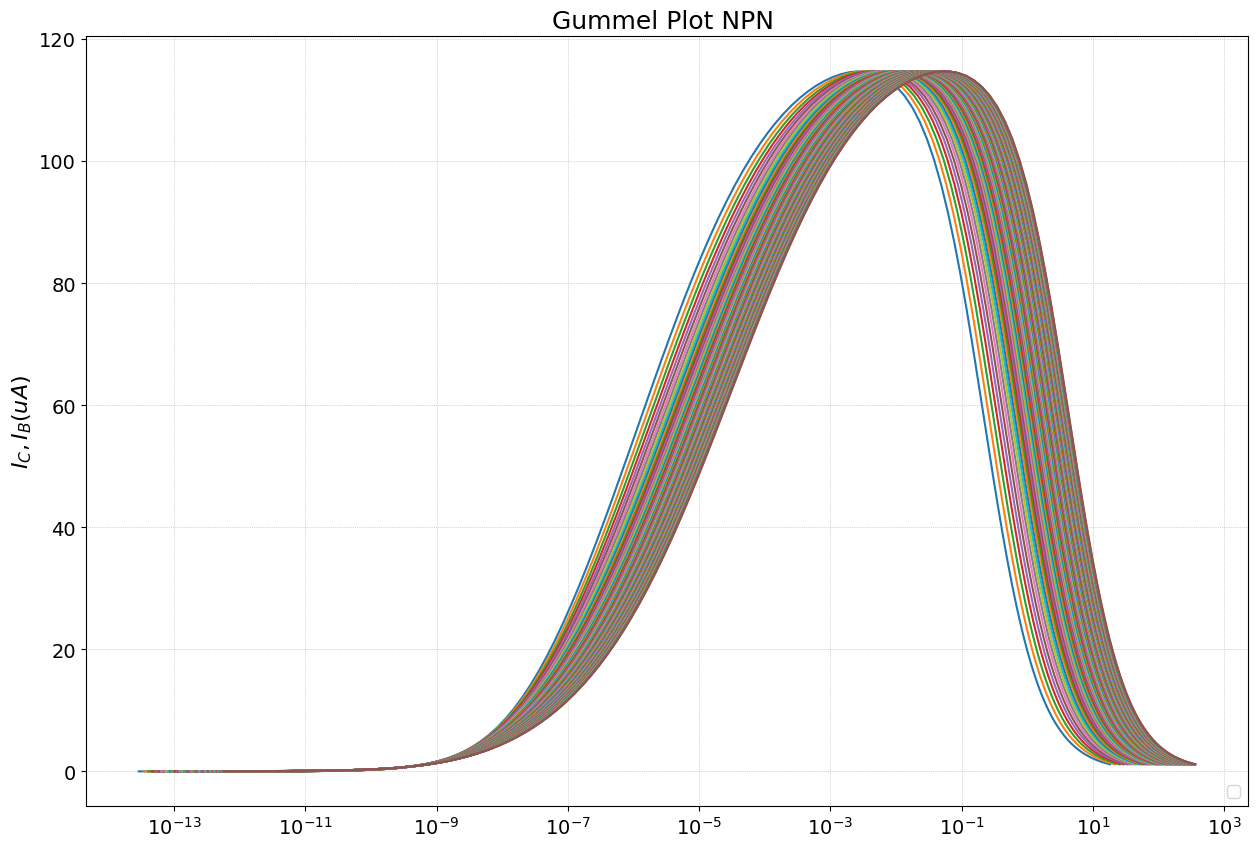

In [6]:
plt.figure(figsize = (15,10))
for i in range(len(num_bipo)):
    plt.semilogx(np.abs(Ic_pnp[:,i])*1e3, Ic_pnp[:,i]/Ib_pnp[:,i] )
    # plt.plot(Ic_pnp[:,i], 
# plt.xlabel(r'VBCE (V)', fontsize=16)
plt.ylabel(r'$I_C, I_B (uA)$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
plt.title('Gummel Plot NPN ', fontsize = 18)
# plt.xlim(0.6,0.8)

Text(0.5, 1.0, 'Beta for different operating point in bipolar transistor')

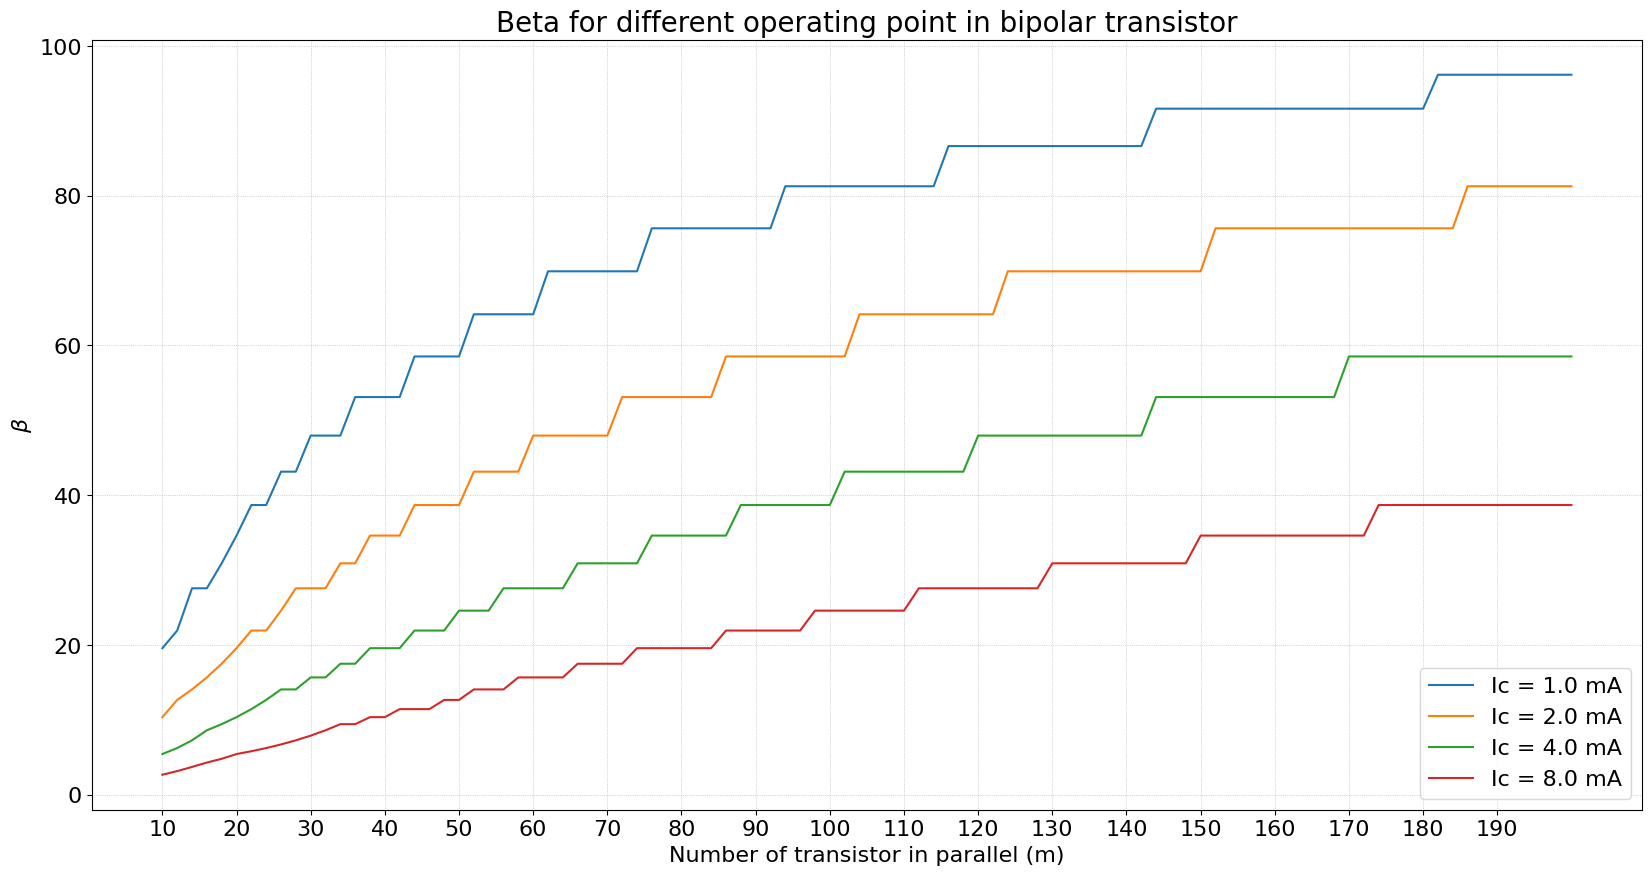

In [7]:
num_plot = np.arange(10,200,10)
beta_Ir1 = [[],[],[],[]]
for i in range(len(Ir)):
    for j in range(96):
        ind = find_index(np.abs(Ic_pnp[:,j]), Ir[i])
        # print('---------')
        # print(Ir[i])
        # print(ind)
        # print('---------')
        beta_Ir1[i].append(Ic_pnp[:,i][ind]/Ib_pnp[:,i][ind])
    
plt.figure(figsize = (20,10))
for i in range(4):
    plt.plot(num_bipo, beta_Ir1[i], label = f'Ic = {Ir[i] * 1e3} mA')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'$\beta$', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.xticks(num_plot, fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.title('Beta for different operating point in bipolar transistor',fontsize = 20)

## 2. Plot the DAC noise (simple case)

Simulation the simple current source and DAC configuration to check the **effectively rationale** of configuration compare to DAC's output noise 
1. Case 1 (1:M)
2. Case 2 (1/M : 1)

Both leads to the ratio of M when comparing the sizing of DAC to the right hand side compared to the left one

### 2.1. Simulation has done using subdivided PNP, NPN. In this case, we fix nnpn = 20, npnp = 22

In [8]:
noise1 = pd.read_csv('noise1.csv', skiprows=1, header=None) # No header
noise2 = pd.read_csv('noise2.csv', skiprows=1, header=None) # No header

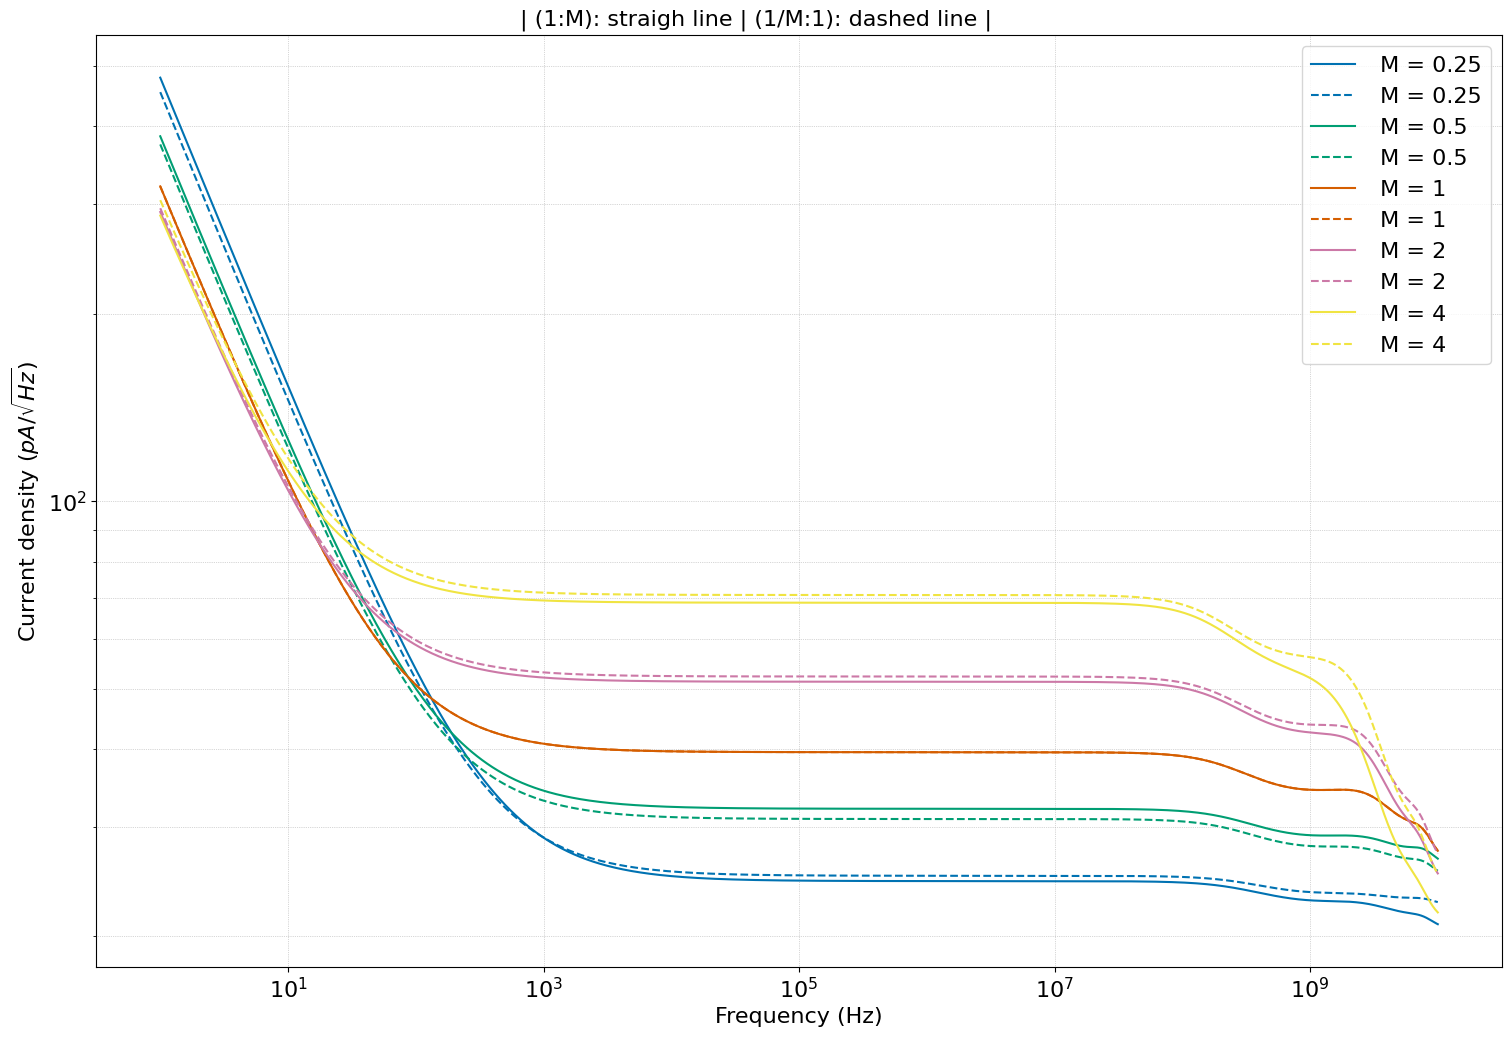

In [9]:
M = [0.25,0.5,1,2,4]
col = ["#0072B2", "#009E73", "#D55E00", "#CC79A7", "#F0E442", "#56B4E9"]
nnpn = 20
npnp = 22
El = 1
note = f'Nnpn = {nnpn}, Npnp = {npnp}, El = {El} um'
note = 'line = case 1, dashed = case 2'
plt.figure(figsize = (15,10), constrained_layout=True)

for i in range(len(M)):
    plt.loglog(noise1[0],noise1[i+1]*1e12, color = col[i], label = f' M = {M[i]}')
    plt.loglog(noise2[0],noise2[i+1]*1e12, color = col[i], linestyle = 'dashed', label = f' M = {M[i]}')

plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 1, note , ha="center", fontsize=16, va="bottom") 

plt.savefig('noise_M.png')

Text(0.5, 1.0, 'Normalized Noise Waveforms for Varying Values of M')

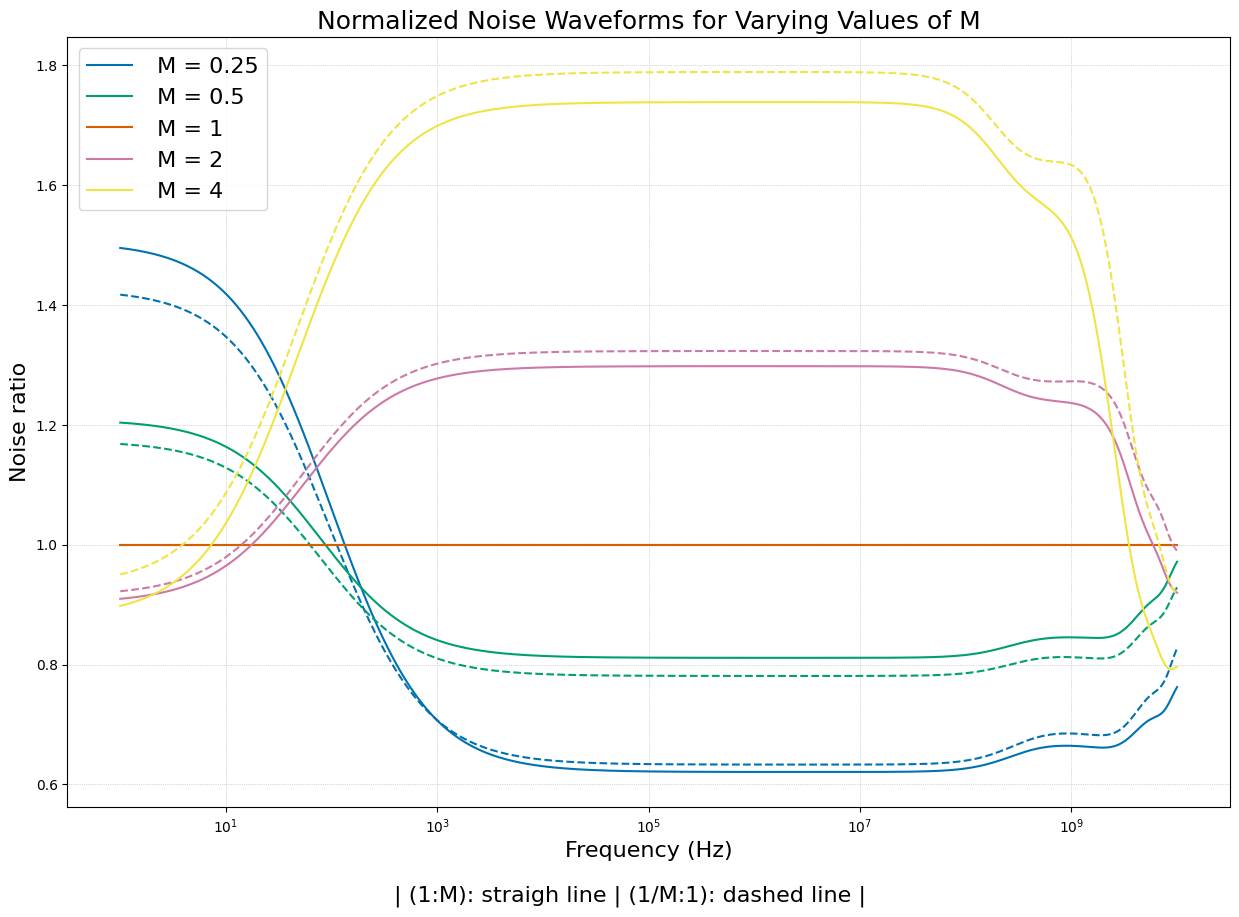

In [10]:
plt.figure(figsize = (15,10))
for i in range(len(M)):
    plt.semilogx(noise1[0],(noise1[i+1]/noise1[3]), color = col[i], label = f' M = {M[i]}')
    plt.semilogx(noise2[0],(noise2[i+1]/noise1[3]), linestyle = 'dashed', color = col[i])
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Noise ratio', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.legend(fontsize = 16)
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
plt.title('Normalized Noise Waveforms for Varying Values of M', fontsize = 18)
# plt.savefig('noise_ratio.png')

### 2.2 a. Fix value of pnp =  22 then varies number of npn

nnpn = [8,12,16,20,24,28,32,36,40]

In [11]:
noise_1 = pd.read_csv('noise1_pnp22_tot.csv', skiprows=1, header=None) # No header
noise_2 = pd.read_csv('noise2_pnp22_tot.csv', skiprows=1, header=None) # No header

In [12]:
nnpn = np.arange(8,202,2)
M = [0.25, 0.5, 1, 2, 4]
M = np.array(M)
n = np.linspace(1, 9, 9)


# Method 1: Using list comprehension
size = len(M)  # Number of empty lists you want
print(size)
M_add1 = [[] for _ in range(size)]
M_add2 = [[] for _ in range(size)]
# print(null_array)  # Output: [[], [], [], [], []]


for i in range(size):
    for j in range(len(nnpn)):
        try:
            index = 1 + i + j * 5  # Calculate the index directly
            M_add1[i].append(noise_1[index])
            M_add2[i].append(noise_2[index])
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break


5


In [13]:
colors = [
    'red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'gold', 'lime'
]
# for i in range(5):
#     plt.figure(figsize = (15,10))
#     plt.title(f'M = {M[i]}')
#     for j in range(0,9):
#         # plt.semilogx(noise_1[0], M_add1[i][j]/M_add1[i][1], color = colors[j],  label = r' $n_{npn}$ = %.0d' %(nnpn[j]))
#         # plt.semilogx(noise_2[0], M_add2[i][j]/M_add2[i][1], color = colors[j], linestyle ='dashed')
#         plt.loglog(noise_1[0], M_add1[i][j]*1e12, color = colors[j],  label = r' $n_{npn}$ = %.0d' %(nnpn[j]))
#         plt.loglog(noise_2[0], M_add2[i][j]*1e12, color = colors[j], linestyle ='dashed')
#     plt.grid(which='both', linestyle=':', linewidth='0.5')
#     plt.ylabel(r'Noise current desity', fontsize=16)
#     plt.xlabel('Frequency (Hz)', fontsize=16)
#     plt.legend(fontsize = 16)
#     note =  '| (1:M): straigh line | (1/M:1): dashed line |'
#     # plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
    

### compare in fraction of noise variation 

Observe the variation in white noise region (f = 10MHz) and low noise region (f = 1 Hz) 

In [14]:
#1 Hz 
noise1Hz_1 = [[],[],[],[],[]]
noise10MHz_1 = [[],[],[],[],[]]
noise1Hz_2 = [[],[],[],[],[]]
noise10MHz_2 = [[],[],[],[],[]]
for i in range(5):
    for j in range(len(nnpn)):
        noise1Hz_1[i].append(M_add1[i][j][1])
        noise10MHz_1[i].append(M_add1[i][j][800])
        noise1Hz_2[i].append(M_add2[i][j][1])
        noise10MHz_2[i].append(M_add2[i][j][800])

Text(0.5, 1.0, 'Noise current density measured at 1Hz')

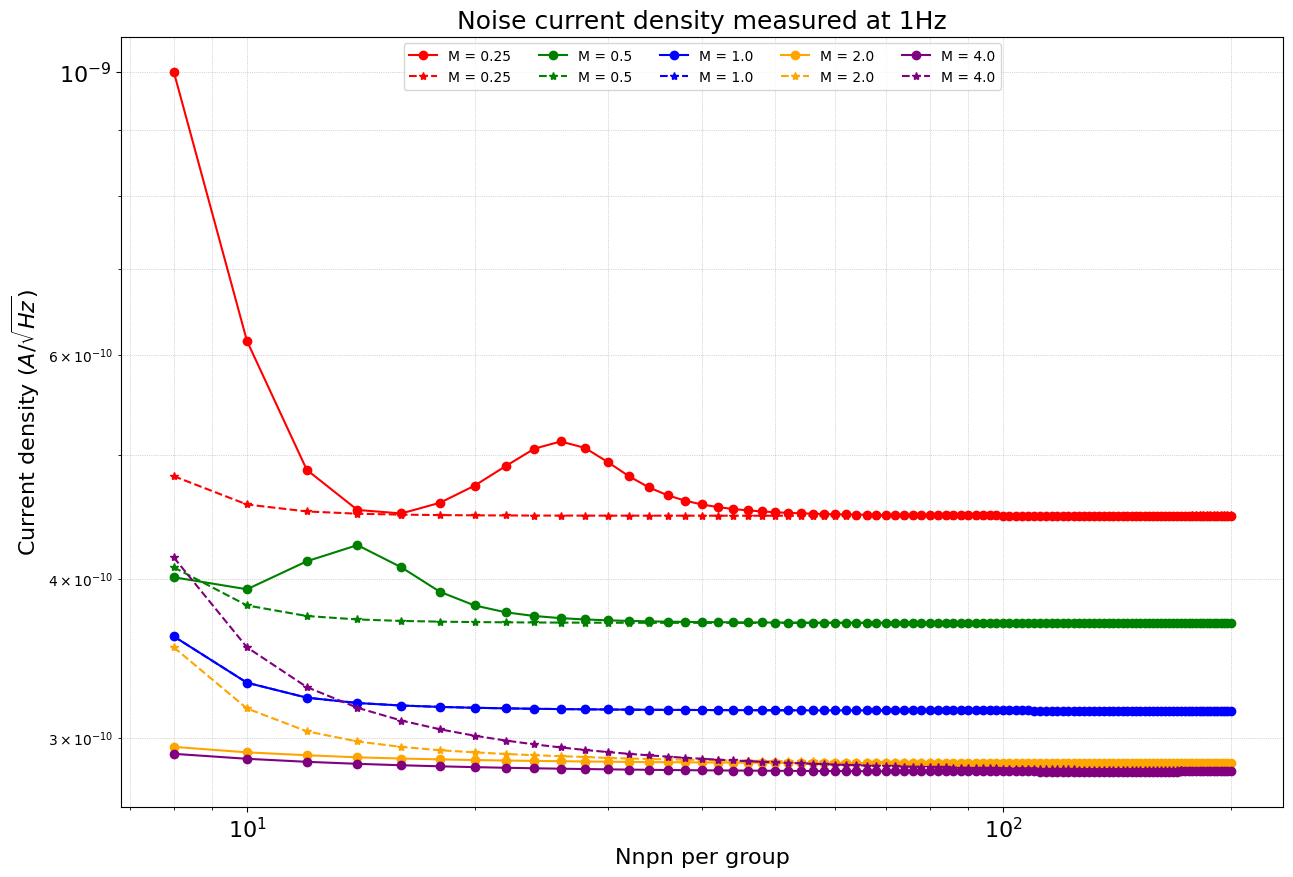

In [15]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.loglog(nnpn, noise1Hz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.loglog(nnpn, noise1Hz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 1Hz',fontsize = 18)
# note =  '| (1:M): straigh line | (1/M:1): dashed line |'
# plt.figtext(0.5, 1, note , ha="center", fontsize=16, va="bottom") 

Text(0.5, 1.0, 'Noise current density measured at 10MHz')

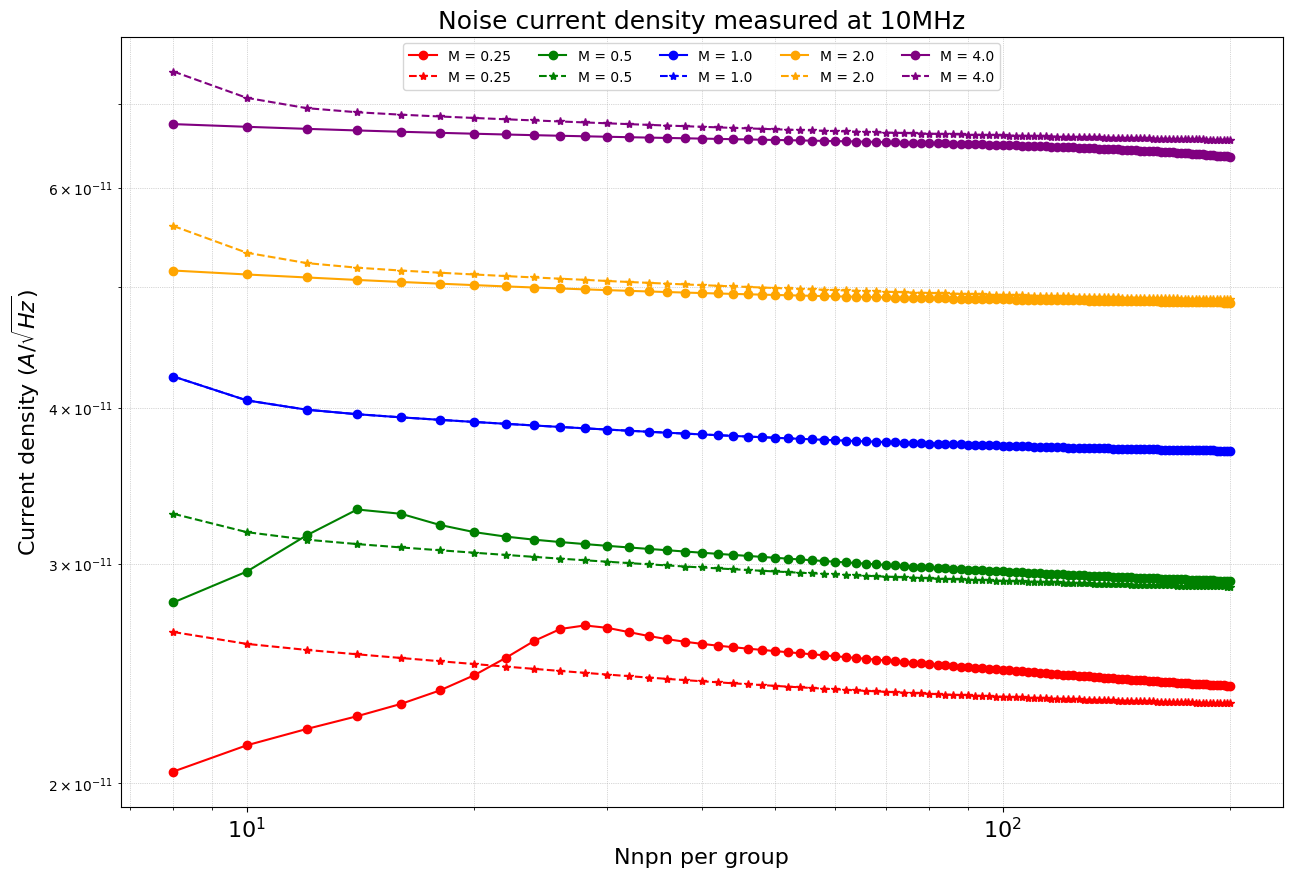

In [16]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.loglog(nnpn, noise10MHz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.loglog(nnpn, noise10MHz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks( fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 10MHz',fontsize = 18)

### 2. Analytical calculate the shot noise contribution


1. Ideal model consist only M and Iout

In [17]:
Iout = 1e-3 #A
 
q = 1.6e-19 #C

def white_noise1(M, Iout):
    Iref = Iout/M
    # return np.sqrt(3*(np.sqrt(M*2*q*Iout))**2 + 2*q*Iout)
    return np.sqrt(2*q*Iout*(3 * M + 1))
wn_analytic = white_noise1(M, Iout)



Text(0.5, 0.01, 'Analytical expression for shot noise: $i_c = \\sqrt{2qI_{out}} \\cdot \\sqrt{3M + 1}$')

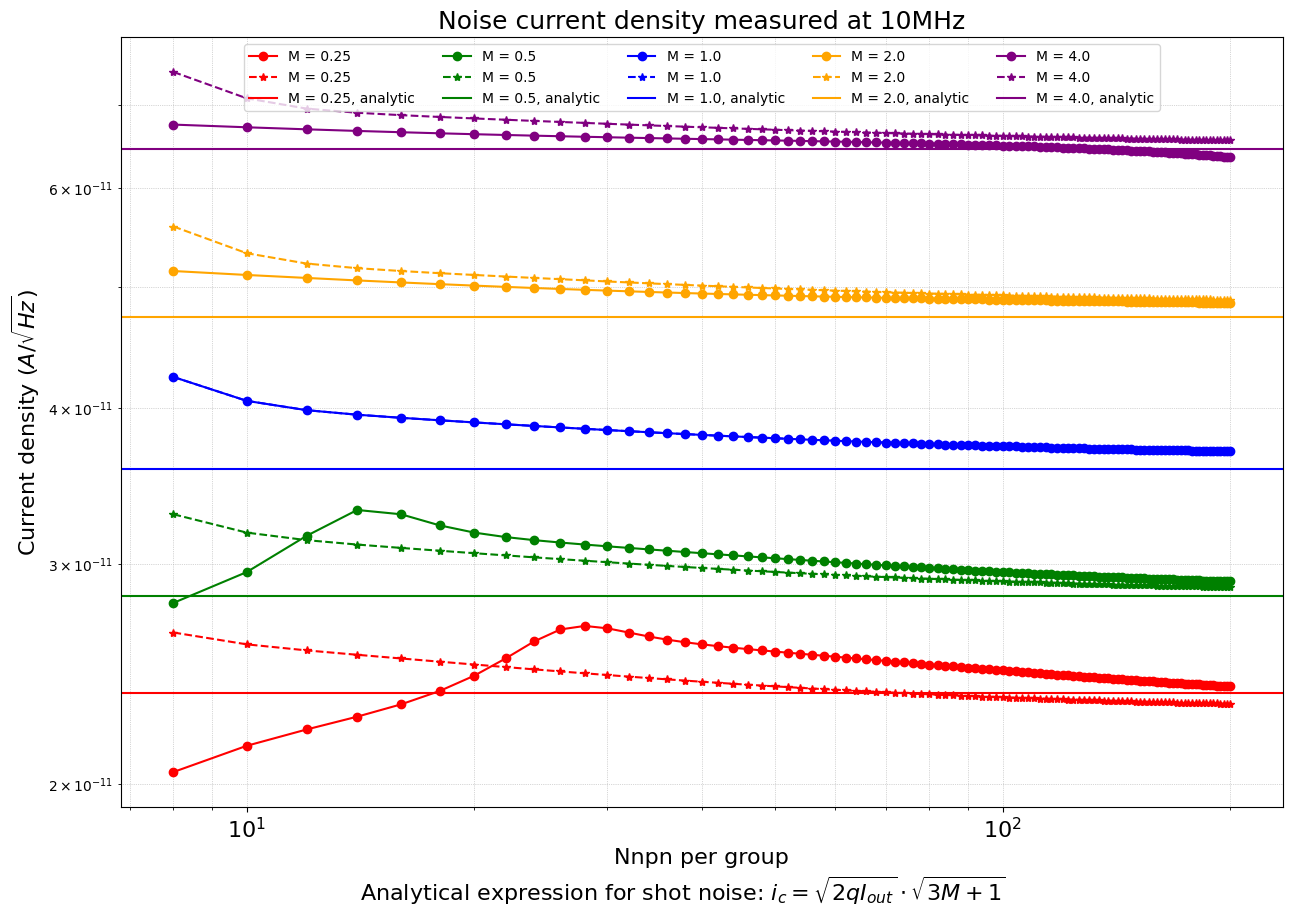

In [18]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.loglog(nnpn, noise10MHz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.loglog(nnpn, noise10MHz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
    plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 10MHz',fontsize = 18)
note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# plt.savefig('noise10MHz.png')

To verify the operation of these device, we will plot the output current 

2. Analytical model but using current measured in simulation

In [50]:
q = 1.6e-19

# Collector current measured from the simulation 
Ic_group = pd.read_csv('current1_to_shotnoise.csv', skiprows=1, header=None)
Ic_group2 = pd.read_csv('current2_to_shotnoise.csv', skiprows=1, header=None)
Ic_group = Ic_group.to_numpy()
Ic_group2 = Ic_group2.to_numpy()
# print(Ic_group)
# print(len(Ic_group[0]))
Ic_group = np.abs(Ic_group[0][1:len(Ic_group[0])])
Ic_group2 = np.abs(Ic_group2[0][1:len(Ic_group2[0])])
# print(len(Ic_group))
size1 = 5*len(nnpn)
# print(size1)
Iref = Ic_group[0:int(size1)]
Iref2 = Ic_group2[0:int(size1)]
# print(Iref[-1])
Ix =   Ic_group[int(size1):2*size1]
Ix2 =   Ic_group2[int(size1):2*size1]

# print(len(Ix))
Iout = Ic_group[int(2*size1):int(3*size1)]
Iout2 = Ic_group2[int(2*size1):int(3*size1)]
# print(Iout[0])
ishot = [[],[],[],[],[]]
ishot2 = [[],[],[],[],[]]
Iout_to_plot = [[],[],[],[],[]]
Iout_to_plot2 = [[],[],[],[],[]]
def white_noise_schema(Iref, Ix, Iout):
    # print(Iout/Ix)
    # return np.sqrt(2*q*((Iout/Ix)**2*(Iref + 2*Ix) + Iout))
    return np.sqrt( (Iout/Ix)**2 * (2 * q * (Iref + 2 * Ix)) + 2 * q * Iout)
    
shot_noise = (white_noise_schema(Iref, Ix, Iout))
shot = []
shot2 = []
for i in range(size1):
    shot.append(white_noise_schema(Iref[i], Ix[i], Iout[i]))
    shot2.append(white_noise_schema(Iref2[i], Ix2[i], Iout2[i]))
ishot2 = [[],[],[],[],[]]
ishot1 = [[],[],[],[],[]]
count = 0
# print(np.array(shot).shape)
for i in range(5):
    for j in range(size1):
        try:
            index =  i + j * 5  # Calculate the index directly
            ishot1[i].append(shot[index])
            ishot2[i].append(shot2[index])
            Iout_to_plot[i].append(Iout[index])
            Iout_to_plot2[i].append(Iout2[index])
            # M_add2[i].append(noise_2[index])
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break


Error: Index 485 out of range for noise_1
Error: Index 486 out of range for noise_1
Error: Index 487 out of range for noise_1
Error: Index 488 out of range for noise_1
Error: Index 489 out of range for noise_1


Text(0.5, 0.005, 'Analytical expression for shot noise:  $i_c = \\sqrt{(\\frac{I_{out}}{I_X})^2 (2q(I_{ref} + 2 I_X)) + 2qI_{out}}$')

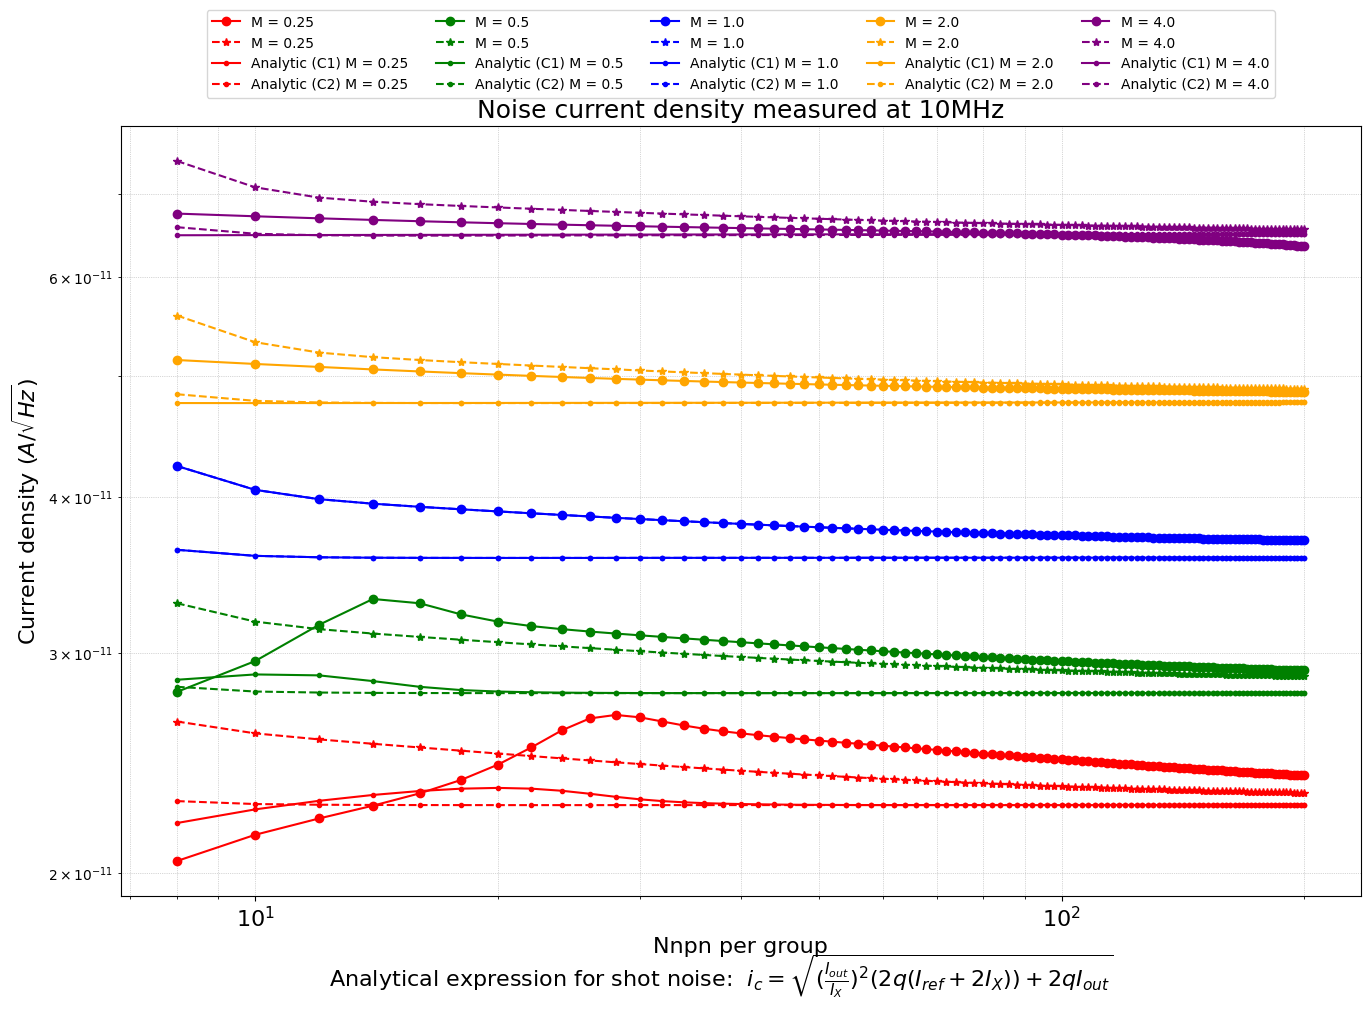

In [20]:
plt.figure(figsize = (16,10))
for i in range(5):
    plt.loglog(nnpn, noise10MHz_1[i], color=colors[i], marker='o', label=f'M = {M[i]}')
    plt.loglog(nnpn, noise10MHz_2[i], color=colors[i], marker='*', linestyle='dashed', label=f'M = {M[i]}')
    
    # Calculate the y-value for axhline outside the loop (if it's constant)
    # y_values = white_noise1(M[i], Iout)  # Get the array of y-values
    # plt.plot(nnpn, y_values, color=colors[i], label=f'(Model 1) M = {M[i]}') 
    plt.loglog(nnpn, ishot1[i],color = colors[i], marker = '.', label = f'Analytic (C1) M = {M[i]}')
    plt.loglog(nnpn, ishot2[i],color = colors[i], marker = '.',linestyle = 'dashed', label = f'Analytic (C2) M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks( fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.16)) 
plt.title('Noise current density measured at 10MHz',fontsize = 18)
note1 = r'Analytical expression for shot noise:'
note2 = r'$i_c = \sqrt{(\frac{I_{out}}{I_X})^2 (2q(I_{ref} + 2 I_X)) + 2qI_{out}}$'
note3 = r'$i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'
plt.figtext(0.5, 0.005, f'{note1}  {note2}', ha="center", fontsize=16, va="bottom")
# plt.savefig('noise10MHz.png')

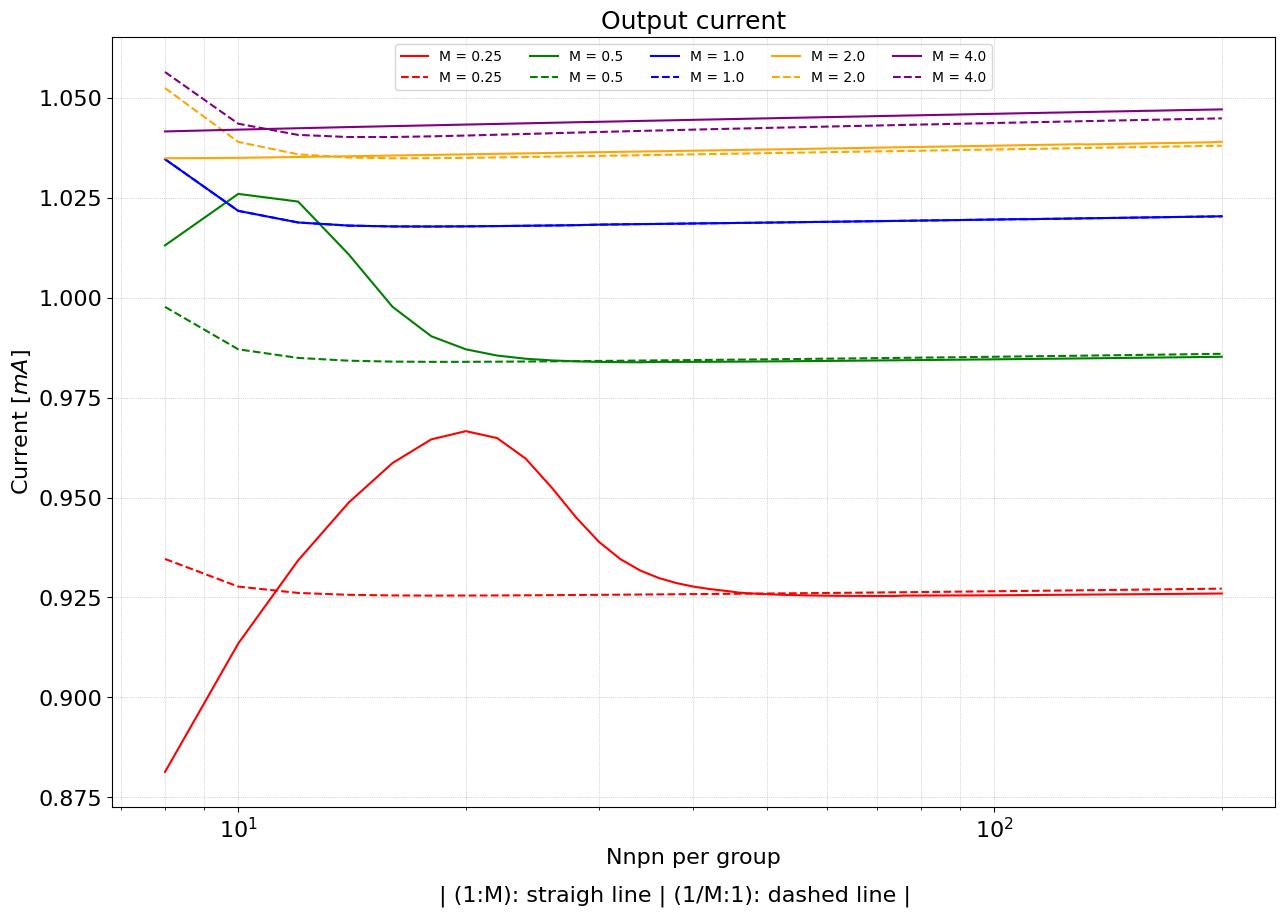

In [59]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.semilogx(nnpn, np.array(Iout_to_plot[i])*1e3,color = colors[i], label = f'M = {M[i]}')
    plt.semilogx(nnpn, np.array(Iout_to_plot2[i])*1e3,linestyle = 'dashed', color = colors[i], label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current [$mA$]', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Output current',fontsize = 18)
# note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# plt.savefig('noise10MHz.png')
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
plt.savefig('Iout.png')

ValueError: operands could not be broadcast together with shapes (201,96) (97,) 

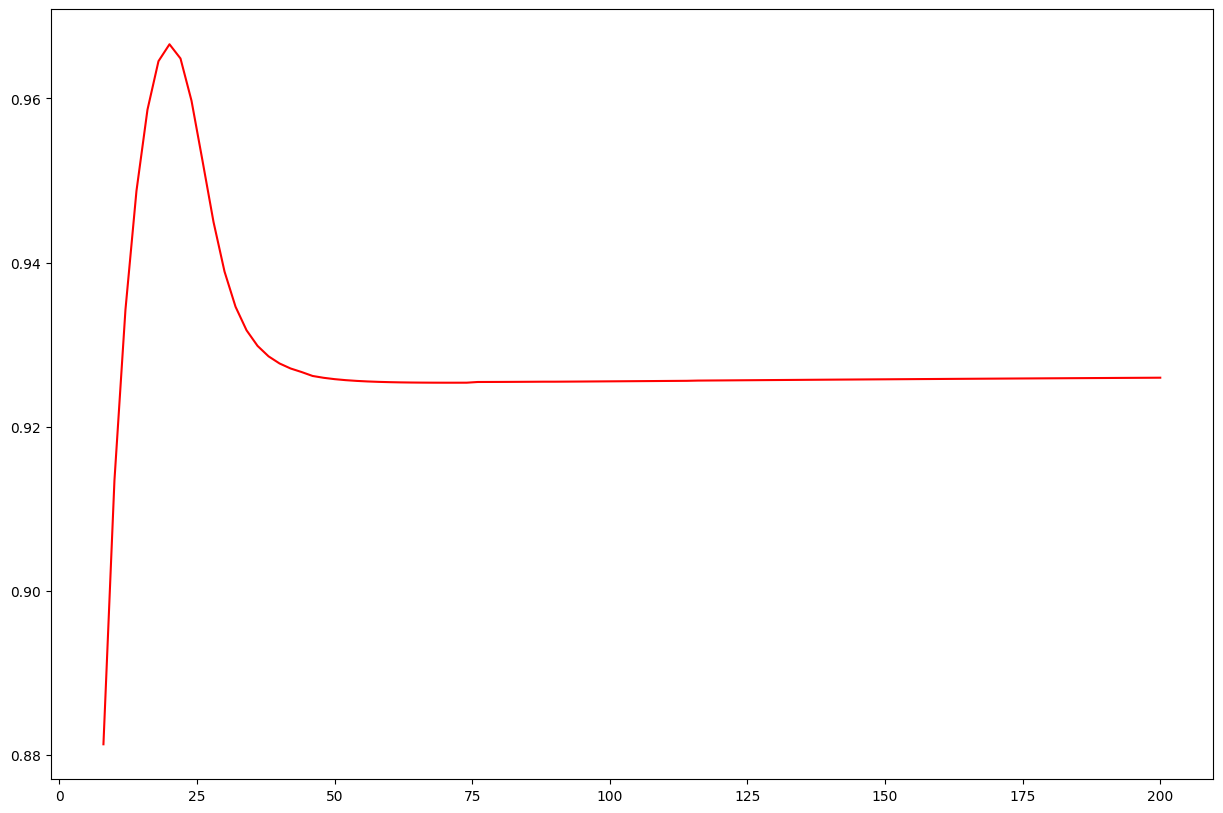

In [55]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.plot(nnpn, np.array(Iout_to_plot[i])*1e3,color = colors[i], label = f' (C1) M = {M[i]}')
    ind_beta = find_index(Ic_npn, Iout_to_plot[i])
    
    plt.plot(nnpn, np.array(Iout_to_plot2[i])*1e3,linestyle = 'dashed', color = colors[i], label = f' (C2) M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current [$mA$]', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Output current',fontsize = 18)
# note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# plt.savefig('noise10MHz.png')
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

### 2.2 b. Fix value of pnp =  102 then varies number of npn

nnpn = [8,12,16,20,24,28,32,36,40]

In [21]:
noise_1_102 = pd.read_csv('noise1_pnp102.csv', skiprows=1, header=None) # No header
noise_2_102 = pd.read_csv('noise2_pnp102.csv', skiprows=1, header=None) # No header

In [22]:

M = np.array(M)
n = np.linspace(1, 9, 9)

M1_1 = []
M2_1 = []
M3_1 = []
M4_1 = []
M5_1 = []
M_add1_102 = [M1_1, M2_1, M3_1, M4_1, M5_1]
M1_2 = []
M2_2 = []
M3_2 = []
M4_2 = []
M5_2 = []
M_add2_102 = [M1_2, M2_2, M3_2, M4_2, M5_2]

for i in range(5):
    for j in range(9):
        try:
            index = 1 + i + j * 5  # Calculate the index directly
            M_add1_102[i].append(noise_1_102[index])
            M_add2_102[i].append(noise_2_102[index])
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break


In [23]:
#1 Hz 
noise1Hz_1_102   = [[],[],[],[],[]]
noise10MHz_1_102 = [[],[],[],[],[]]
noise1Hz_2_102   = [[],[],[],[],[]]
noise10MHz_2_102 = [[],[],[],[],[]]
for i in range(5):
    for j in range(9):
        noise1Hz_1_102[i].append(  M_add1_102[i][j][1])
        noise10MHz_1_102[i].append(M_add1_102[i][j][800])
        noise1Hz_2_102[i].append(  M_add2_102[i][j][1])
        noise10MHz_2_102[i].append(M_add2_102[i][j][800])

In [25]:
# plt.figure(figsize = (15,10))
# for i in range(5):
#     plt.semilogy(nnpn, noise10MHz_1_102[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
#     # plt.semilogy(nnpn, noise10MHz_2_102[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
#     plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
# plt.grid(which='both', linestyle=':', linewidth='0.5')
# plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
# plt.xlabel('Nnpn per group', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
# plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
# plt.title('Noise current density measured at 10MHz',fontsize = 18)
# note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
# # plt.savefig('noise10MHz.png')

### Calculate surface area

In [26]:
Spnp = 9.49 * 8.5 #um^2 (can touch btrench?)
Snpn = 5.7 * 4.49 #um^2 doesn't count the infusion
def S1(M, nnpn):
    return 22 * Spnp * 2 +   nnpn * Snpn + M * nnpn * Snpn
def S2(M, nnpn):
    return 22 * Spnp * 2 +   nnpn * Snpn / M +  nnpn * Snpn

In [27]:
#calculate the surface area 
A1 = [[],[],[],[],[]]
A2 = [[],[],[],[],[]]
for i in range(5):
    for j in range(len(nnpn)):
        A1[i].append(S1(M[i], nnpn[j]))
        A2[i].append(S2(M[i], nnpn[j]))
        

Text(0.5, 0.01, '| (1:M): $\\bullet$ | (1/M:1): $\\blacktriangle$ |')

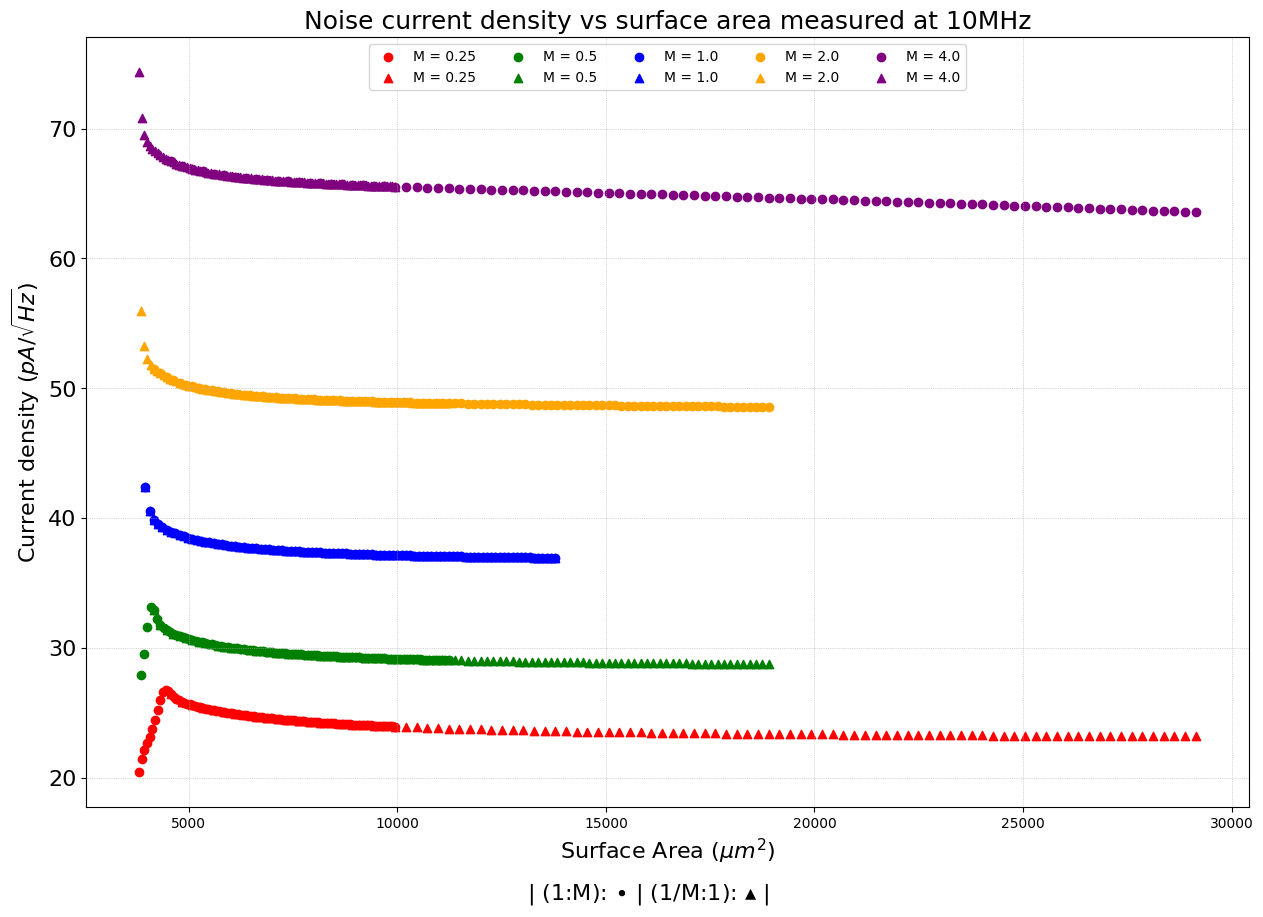

In [28]:
#scatter plot? 

plt.figure(figsize = (15,10))
for i in range(5):
    plt.scatter(A1[i], np.array(noise10MHz_1[i])*1e12,color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.scatter(A2[i], np.array(noise10MHz_2[i])*1e12,color = colors[i], marker = "^",  label = f'M = {M[i]}')
    # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density vs surface area measured at 10MHz',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

Text(0.5, 0.01, '| (1:M): $\\bullet$ | (1/M:1): $\\blacktriangle$ |')

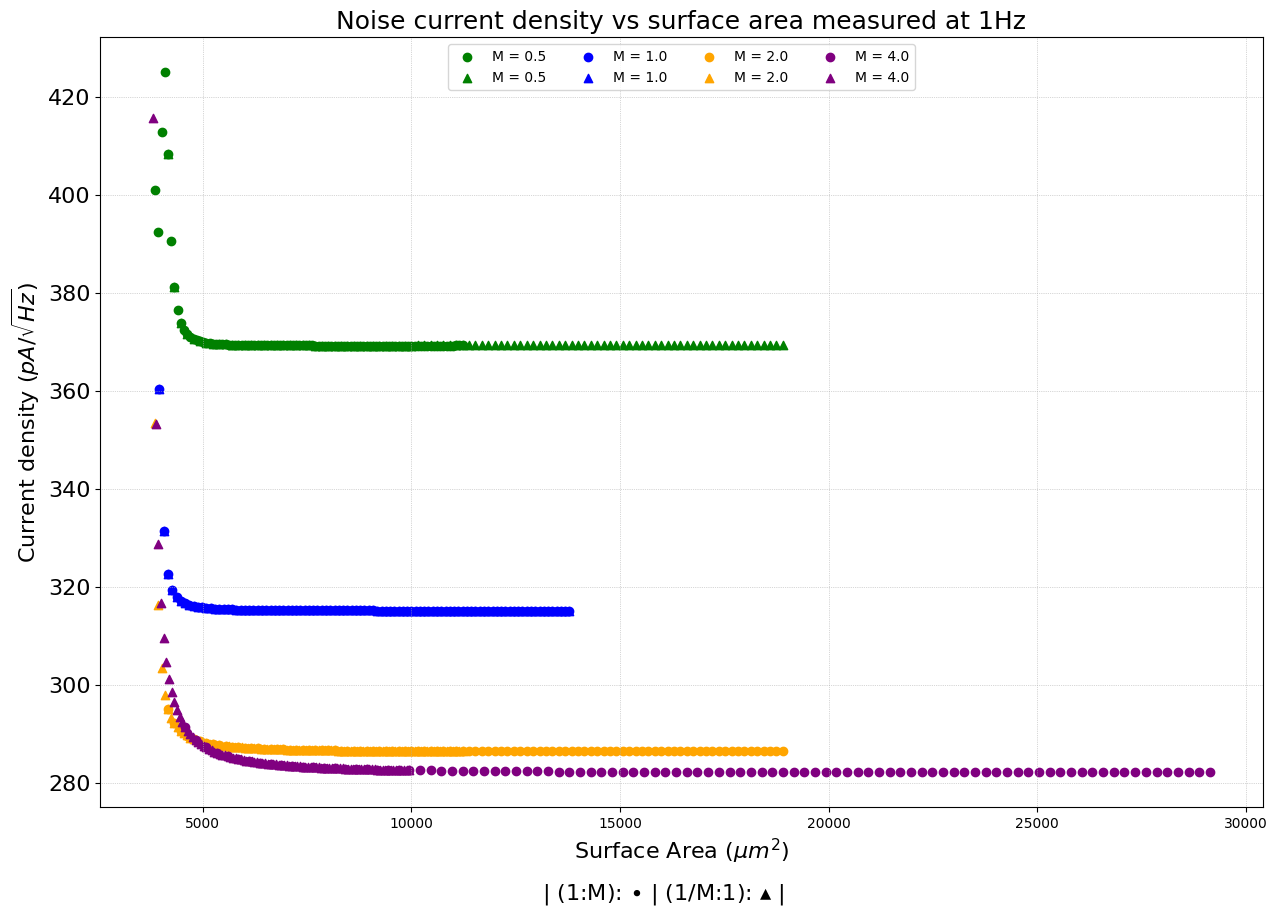

In [29]:
plt.figure(figsize = (15,10))
for i in range(1,5):
    plt.scatter(A1[i], np.array(noise1Hz_1[i])*1e12,color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.scatter(A2[i], np.array(noise1Hz_2[i])*1e12,color = colors[i], marker = "^",  label = f'M = {M[i]}')
    # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1)) 
plt.title('Noise current density vs surface area measured at 1Hz',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

NameError: name 'ranked_area' is not defined

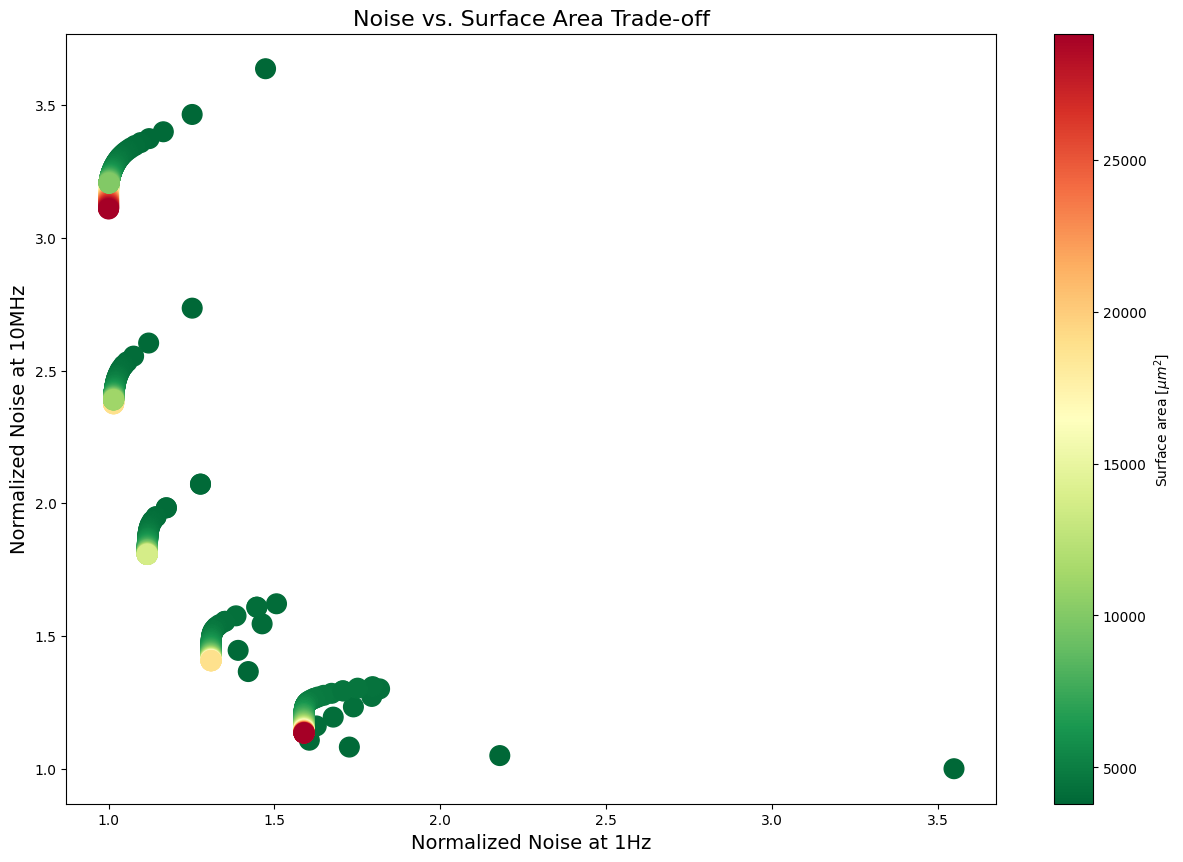

In [32]:
# Sample data (flatten data)
noise_1Hz = [noise1Hz_1, noise1Hz_2]
noise_1Hz = np.array(noise_1Hz).flatten() 

noise_10MHz = [noise10MHz_1, noise10MHz_2]
noise_10MHz = np.array(noise_10MHz).flatten()

area = [A1,A2]
area = np.array(area).flatten()

# Normalize the data
noise_1Hz_norm = noise_1Hz / np.min(noise_1Hz)
noise_10MHz_norm = noise_10MHz / np.min(noise_10MHz)
area_norm = area / np.min(area)

# Weights (adjust these based on your priorities)
w1 = 0.5  # Weight for noise at 1Hz   (we focuse on flicker noise)
w2 = 0.5  # Weight for noise at 10MHz 
# w3 = 0.3  # Weight for surface area

# Calculate the combined metric (weighted sum)
combined_metric = w1 * noise_1Hz_norm + w2 * noise_10MHz_norm

# Rank the data points (lower is better)
rank_indices = np.argsort(combined_metric)
ranked_noise_1Hz = noise_1Hz[rank_indices]
ranked_noise_10MHz = noise_10MHz[rank_indices]
# ranked_area = area[rank_indices]
# ranked_metric = combined_metric[rank_indices]

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(noise_1Hz_norm, noise_10MHz_norm, c=area, cmap='RdYlGn_r', s=200)
plt.colorbar(scatter, label=r'Surface area [$\mu m^2$] ')
plt.xlabel('Normalized Noise at 1Hz', fontsize=14)
plt.ylabel('Normalized Noise at 10MHz', fontsize=14)
plt.title('Noise vs. Surface Area Trade-off', fontsize=16)

# Annotate points with rank, surface area, and original index
for i, txt in enumerate(ranked_area):
    original_index = rank_indices[i]  # Get the original index
    # plt.annotate(f'{i+1} ({original_index})', 
                 # (noise_1Hz_norm[original_index], noise_10MHz_norm[original_index]), 
                 # textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
# plt.xlim(1,2)
plt.grid(True)
# plt.savefig('Noise_optimize.png')
plt.show()

# Print ranked data with original index
print("Ranked Data:")
best_index = rank_indices[0]  # Get the original index of the best-ranked solution
print(f"The best-ranked solution is at index: {best_index}")

for i in range(len(ranked_metric)):
    original_index = rank_indices[i]
    print(f"Rank {i+1} (Index: {original_index}): Noise 1Hz = {ranked_noise_1Hz[i]*1e12:.2e} pA/sqrt(Hz), Noise 10MHz = {ranked_noise_10MHz[i]*1e12:.2e} pA/sqrt(Hz)")


(970,)


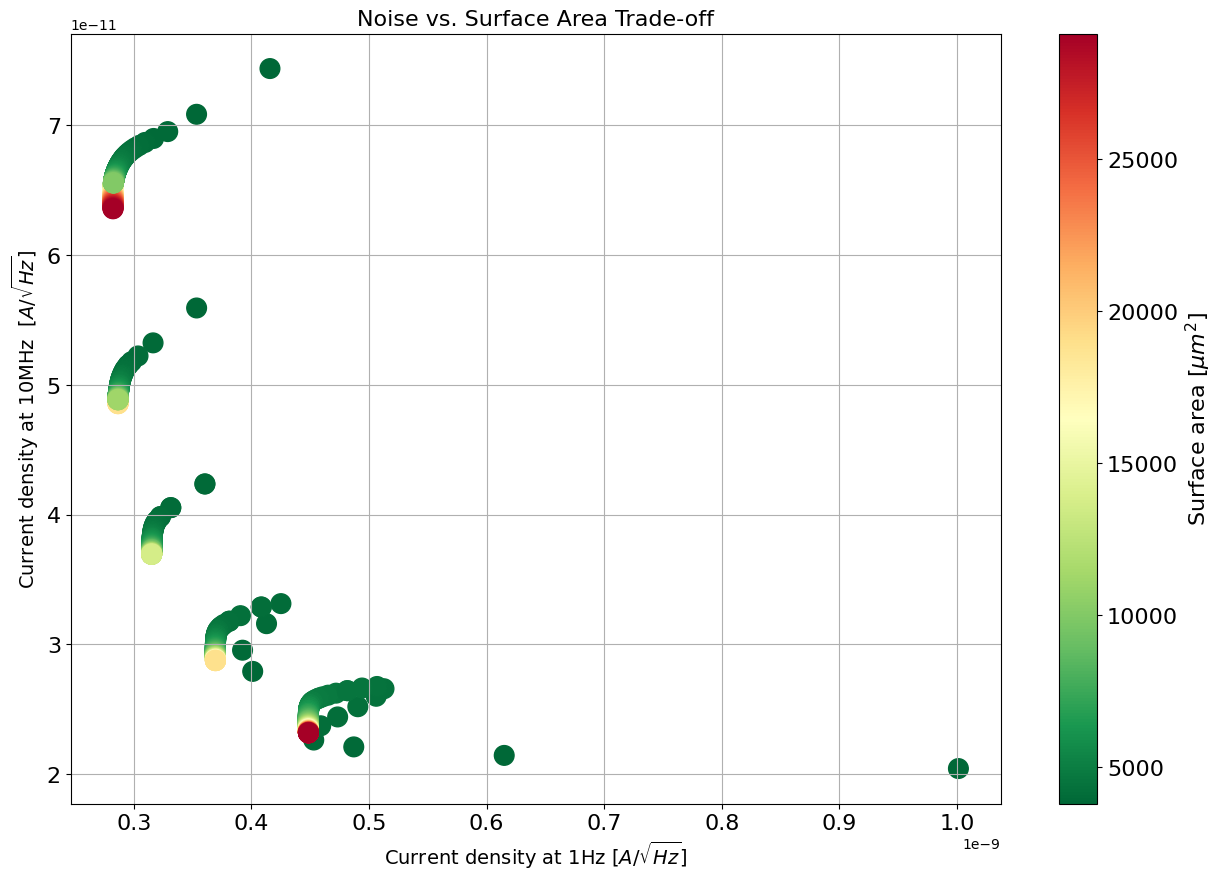

In [33]:
plt.figure(figsize = (15,10))
# plt.scatter(noise_1Hz, noise_10MHz)
scatter = plt.scatter(noise_1Hz, noise_10MHz, c=area, cmap='RdYlGn_r', s=200)
print(noise_1Hz.shape)
cbar = plt.colorbar(scatter, label=r'Surface area [$\mu m^2$]')
cbar.ax.tick_params(labelsize=16)  # Set the font size of the colorbar ticks
cbar.ax.set_ylabel(r'Surface area [$\mu m^2$]', fontsize=16)  # Set the font size of the colorbar label
plt.xlabel(r'Current density at 1Hz [$A/\sqrt{Hz}$]', fontsize=14)
plt.ylabel('Current density at 10MHz  [$A/\sqrt{Hz}$]', fontsize=14)
plt.title('Noise vs. Surface Area Trade-off', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.xlim(1,2)
plt.grid(True)
plt.savefig('Noise_optimize.png')

In [34]:
# noise_square_1 = noise_1
# noise_square_2 = noise_2
# for i in range(1,45):
#     noise_square_1[i] = noise_square_1[i]**2
#     noise_square_2[i] = noise_square_2[i]**2
# print(noise_square_1)

In [35]:
def integral(frequency, data):
    S = 0
    for i in range(1,len(frequency)):
        S = S + 0.5 * (data[i-1]**2 + data[i]**2) * (frequency[i] - frequency[i-1])
    return S 


In [36]:
RMS_1 = [[],[],[],[],[]] 
RMS_2 = [[],[],[],[],[]]
#we want to limit the bw from 1 to 1000


for i in range(5):
    for j in range(9):
        try:
            index = 1 + i + j * 5  # Calculate the index directly
            RMS_1[i].append(integral(noise_1[0][0:300],noise_1[index][0:300]))
            RMS_2[i].append(integral(noise_1[0][0:300],noise_2[index][0:300]))
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break

In [37]:
RMS = np.array([RMS_1,RMS_2]).flatten()

ValueError: x and y must be the same size

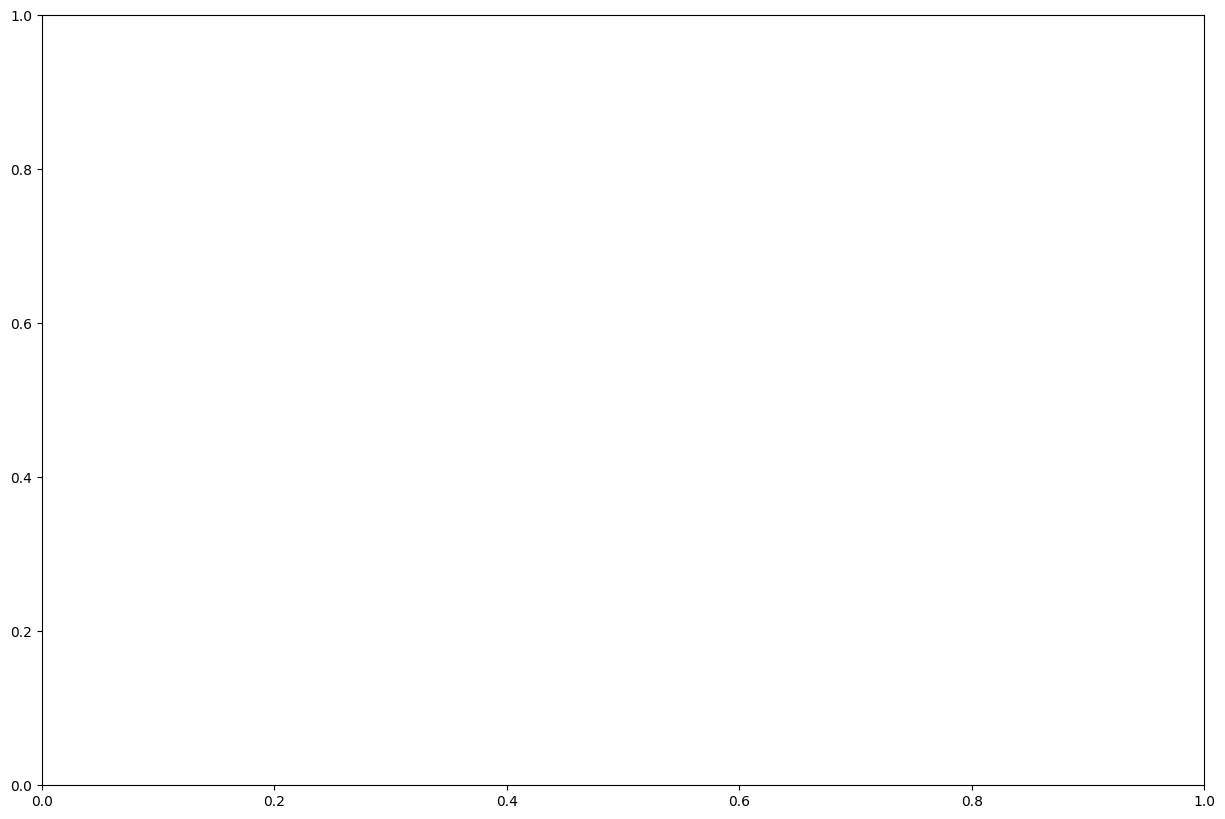

In [38]:
plt.figure(figsize = (15,10))
plt.scatter(area, RMS)

In [ ]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.scatter(A1[i], RMS_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.scatter(A2[i], RMS_2[i],color = colors[i], marker = "^",  label = f'M = {M[i]}')
    # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'$RMS^2$ ($A^2$)', fontsize=16)
plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1)) 
plt.title('Noise current density vs surface area measured at 1Hz',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

In [39]:
# Normalize the data
RMS = np.sqrt(RMS)
RMS_norm = RMS / np.min(RMS)
# Calculate the combined metric (weighted sum)
w1 = 0.5
w2 = 0.5
combined_metric = w1 * RMS_norm + w2 * area_norm

# Rank the data points (lower is better)
rank_indices = np.argsort(combined_metric)
ranked_RMS = RMS[rank_indices]
ranked_area = area[rank_indices]
ranked_metric = combined_metric[rank_indices]

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(area_norm, RMS_norm, c=combined_metric, cmap='viridis', s=100)
plt.colorbar(scatter, label='Combined Metric')
plt.xlabel('Surface area', fontsize=14)
plt.ylabel('Normalize RMS from 1Hz to 1kHz', fontsize=14)
plt.title('RMS vs. Surface Area Trade-off', fontsize=16)

# Annotate points with rank, surface area, and original index
for i, txt in enumerate(ranked_area):
    original_index = rank_indices[i]  # Get the original index
    plt.annotate(f'{i+1} ({original_index})', 
                 (RMS[original_index], noise_10MHz_norm[original_index]), 
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
# plt.xlim(1,2)
plt.grid(True)
plt.show()

# Print ranked data with original index
print("Ranked Data:")
best_index = rank_indices[0]  # Get the original index of the best-ranked solution
print(f"The best-ranked solution is at index: {best_index}")

for i in range(len(ranked_metric)):
    original_index = rank_indices[i]
    print(f"Rank {i+1} (Index: {original_index}): RMS = {ranked_RMS[i]:.2e} A, normalise_RMS = {(ranked_RMS[i]/min(RMS)):.2e}, Area = {ranked_area[i]:.1f} um^2, normalised area = {(ranked_area[i]/(min(area))):.1f}")

ValueError: operands could not be broadcast together with shapes (90,) (970,) 

In [40]:
# to check exactly the case of the index 
def analyze_index(index, M, N):
    """
    Analyzes an index and prints corresponding information based on its value.

    Args:
      index: The input index.
      M: A known array of M values.
      N: A known array of N values.
    """

    index += 1  # Add 1 to the index
    

    if index < 46:
        print("Case 1")
        M_value = M[index // 9]  
        b = index - ((index // 9) * 9)  # Calculate b for Case 1
        print(f'M = {M_value}')
        print(f'nnpn = {nnpn[int(b) - 1]}')  # Adjust index for nnpn (0-based)
        print(' |                  | ')
        print(' |                  | ')
        print(' |                  | ')
        print('  \|               |/ ')
        print('   |-------|-------|  ')
        print('  /|       |       |\ ')
        print(' |_________|         | ')
        print(' |                   | ')
        print(' |                   | ')
        print(f' |   {nnpn[int(b) - 1]}   :    {int(M_value*nnpn[int(b) - 1])}     | ')
    else:
        print("Case 2")
        M_value = M[(index - 45) // 9]
        b = index - 45 - ((index - 45) // 9) * 9  # Calculate b for Case 2
        print(f'M = {M_value}')
        print(f'nnpn = {nnpn[int(b) - 1]}')  # Adjust index for nnpn (0-based)
        print(' |                   | ')
        print(' |                   | ')
        print(' |                   | ')
        print('  \|               |/ ')
        print('   |-------|-------|  ')
        print('  /|       |       |\ ')
        print(' |_________|         | ')
        print(' |                   | ')
        print(' |                   | ')
        print(f' |   {int(nnpn[int(b) - 1]/M_value)}   :    {nnpn[int(b) - 1]}    | ')
  

analyze_index(2,M,nnpn)

Case 1
M = 0.25
nnpn = 12
 |                  | 
 |                  | 
 |                  | 
  \|               |/ 
   |-------|-------|  
  /|       |       |\ 
 |_________|         | 
 |                   | 
 |                   | 
 |   12   :    3     | 
